In [120]:
import numpy as np
import pandas as pd
import os

import mne

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA

from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM, GRU, Embedding, SimpleRNN, Conv2D, Flatten
from tensorflow.keras.layers import InputSpec

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam

from keras import activations, initializers, regularizers, constraints
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [2]:
#reading data from CSVs in bulk

speaking1 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking1_labelled.csv')
speaking2 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking2_labelled.csv')
speaking3 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking3_labelled.csv')
speaking4 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking4_labelled.csv')
speaking5 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking5_labelled.csv')
speaking6 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking6_labelled.csv')
speaking7 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking7_labelled.csv')
speaking8 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking8_labelled.csv')
speaking9 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking9_labelled.csv')
speaking10 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking10_labelled.csv')

speaking = pd.concat([speaking1, speaking2, speaking3, speaking4, speaking5, speaking6, speaking7, speaking8, speaking9, speaking10], axis = 0)

In [3]:
speaking

Time:256Hz  Epoch           F3          FC5          AF3           F7  \
0        23.000000      0  4249.487305  4254.743652  4278.461426  4266.282227   
1        23.003906      0  4249.487305  4254.743652  4278.461426  4266.282227   
2        23.007812      0  4249.487305  4254.743652  4278.461426  4266.282227   
3        23.011719      0  4249.487305  4254.743652  4278.461426  4266.282227   
4        23.015625      0  4249.487305  4254.743652  4278.461426  4266.282227   
...            ...    ...          ...          ...          ...          ...   
66555  4503.980469    129  4245.384766  4263.589844  4286.666504  4263.333496   
66556  4503.984375    129  4245.384766  4263.589844  4286.666504  4263.333496   
66557  4503.988281    129  4245.384766  4263.589844  4286.666504  4263.333496   
66558  4503.992188    129  4245.384766  4263.589844  4286.666504  4263.333496   
66559  4503.996094    129  4245.384766  4263.589844  4286.666504  4263.333496   

                T7           P7           O1           O2  ...           T8  \
0      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
1      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
2      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
3      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
4      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
...            ...          ...          ...          ...  ...          ...   
66555  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   
66556  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   
66557  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   
66558  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   
66559  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   

                F8          AF4          FC6           F4   Channel 15  \
0      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
1      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
2      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
3      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
4      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
...            ...          ...          ...          ...          ...   
66555  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   
66556  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   
66557  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   
66558  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   
66559  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   

        Channel 16  Label Mode of Stimulus       Stage  
0      4256.410156   Lamp            audio   speaking1  
1      4256.410156   Lamp            audio   speaking1  
2      4256.410156   Lamp            audio   speaking1  
3      4256.410156   Lamp            audio   speaking1  
4      4256.410156   Lamp            audio   speaking1  
...            ...    ...              ...         ...  
66555  4264.358887  Clock             text  speaking10  
66556  4264.358887  Clock             text  speaking10  
66557  4264.358887  Clock             text  speaking10  
66558  4264.358887  Clock             text  speaking10  
66559  4264.358887  Clock             text  speaking10  

[665600 rows x 21 columns]

# Splitting data

In [46]:
def Handle(dataframe):
    
    features = dataframe.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 16', 'Channel 15', 'Label', 'Mode of Stimulus']).to_numpy().reshape(dataframe.shape[0] // (512), 512 * 14)
    targets = dataframe['Label'].to_numpy().reshape(dataframe.shape[0] // (512), 512)[:, 0]
    modes_of_stimuli = dataframe['Mode of Stimulus'].to_numpy().reshape(dataframe.shape[0] // (512), 512)[:, 0]
    return features, targets, modes_of_stimuli

features, targets, modes_of_stimuli = Handle(speaking)

In [5]:
modes_of_stimuli.shape

(1300,)

In [6]:
targets.shape

(1300,)

In [7]:
speaking_mne = speaking.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Mode of Stimulus', 'Label', 'Stage'])

# MNE preprocessing

## Montage using standard 10-20 model

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>
4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


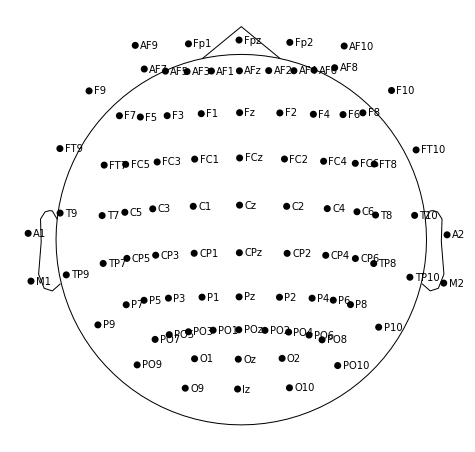

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


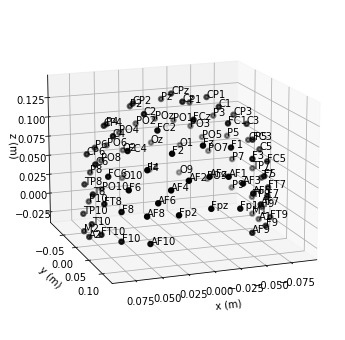

In [8]:
s1020 = mne.channels.make_standard_montage('standard_1020')
print(s1020)

s1020.plot()  # 2D
fig = s1020.plot(kind='3d', show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial


{'F3': array([-0.04908182,  0.06114545,  0.04584545]), 'F4': array([0.04908182, 0.06114545, 0.04584545]), 'O1': array([-0.02809091, -0.08646364,  0.        ]), 'O2': array([ 0.02809091, -0.08646364,  0.        ]), 'F7': array([-0.07354545,  0.05343636,  0.        ]), 'F8': array([0.07354545, 0.05343636, 0.        ]), 'T7': array([-0.09090909,  0.        ,  0.        ]), 'T8': array([0.09090909, 0.        , 0.        ]), 'P7': array([-7.35454545e-02, -5.34363636e-02, -9.09090909e-06]), 'P8': array([ 7.35454545e-02, -5.34363636e-02, -9.09090909e-06]), 'FC5': array([-0.07917273,  0.03066364,  0.03226364]), 'FC6': array([0.07917273, 0.03066364, 0.03226364]), 'AF3': array([-0.03636364,  0.08181818,  0.03909091]), 'AF4': array([0.03636364, 0.08181818, 0.03909091])}


C:\Users\ruthwik\AppData\Local\Temp\ipykernel_33924\3125229318.py:10: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  montage.plot()


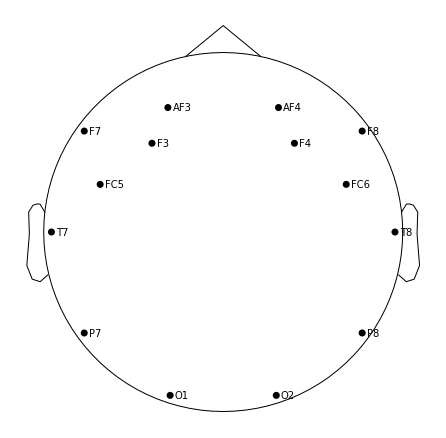

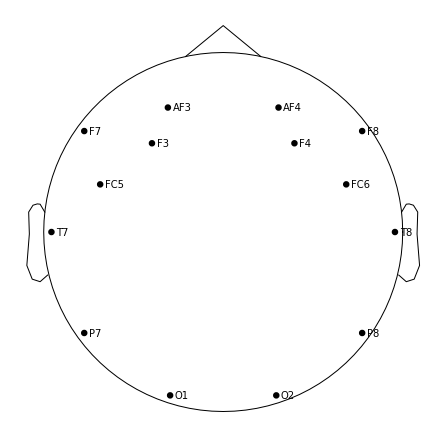

In [9]:
#creating the montage positions (dig = digitization points)

df = pd.read_csv('E:/Diss/Paradigm/14channelsDIG.txt')
ch_names = df.name.to_list()

pos = df[['x','y','z']].values/11 # Scale down to size
dig_ch_pos = dict(zip(ch_names,pos))
print(dig_ch_pos)
montage = mne.channels.make_dig_montage(ch_pos=dig_ch_pos)
montage.plot()

In [10]:
#creating montage from speaking data

sfreq = 256
ch_names = list(speaking_mne.columns)
print(ch_names)
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = 'eeg')
raw_speaking = mne.io.RawArray(speaking_mne[ch_names].transpose(), info)
raw_speaking.set_montage(s1020)
raw_speaking.info

['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']
Creating RawArray with float64 data, n_channels=14, n_times=665600
    Range : 0 ... 665599 =      0.000 ...  2599.996 secs
Ready.


<Info | 8 non-empty values
 bads: []
 ch_names: F3, FC5, AF3, F7, T7, P7, O1, O2, P8, T8, F8, AF4, FC6, F4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


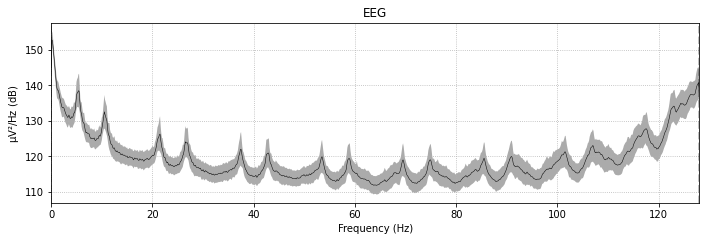

In [11]:
fig = raw_speaking.plot_psd(fmax=128, average=True)

for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


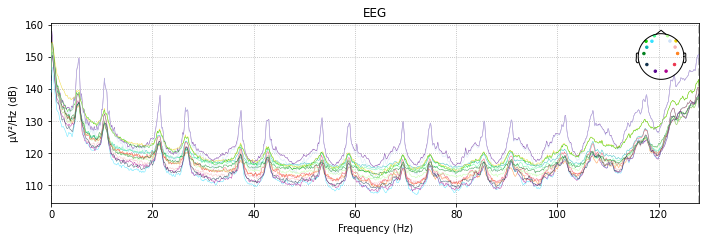

Using matplotlib as 2D backend.


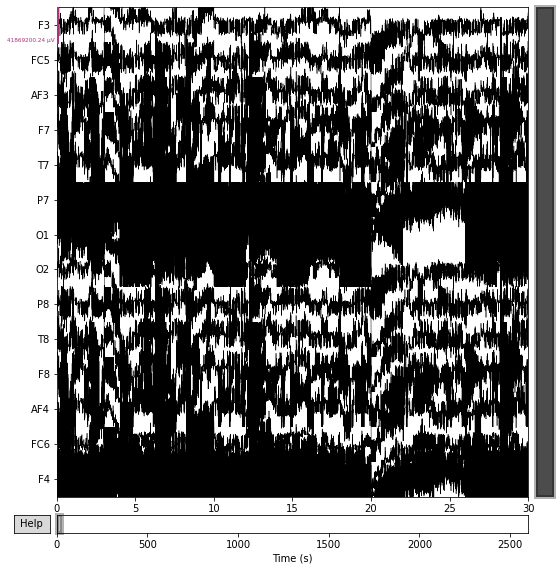

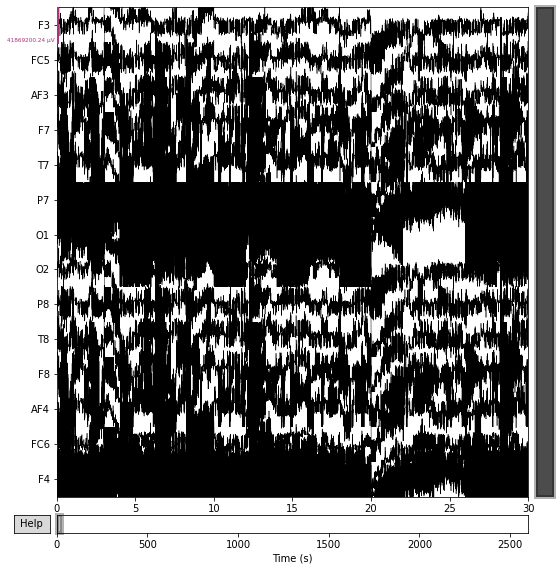

In [12]:
raw_speaking.plot_psd(fmax=128)
raw_speaking.plot(duration=30, n_channels=14, scalings='auto')

In [13]:
#projectors

ssp_projectors = raw_speaking.info['projs']
print(ssp_projectors)
raw_speaking.del_proj()

[]


<RawArray | 14 x 665600 (2600.0 s), ~71.1 MB, data loaded>

## Band pass filtering

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


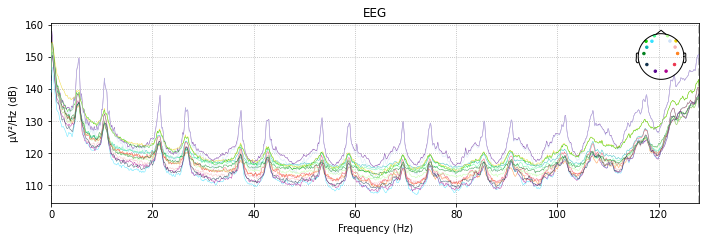

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


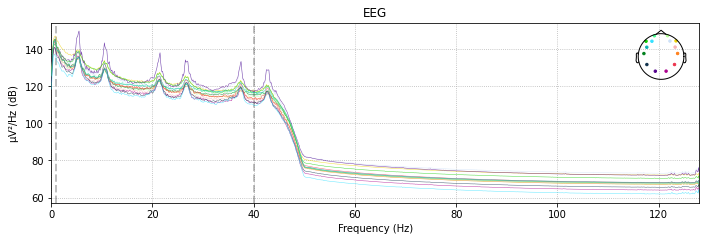

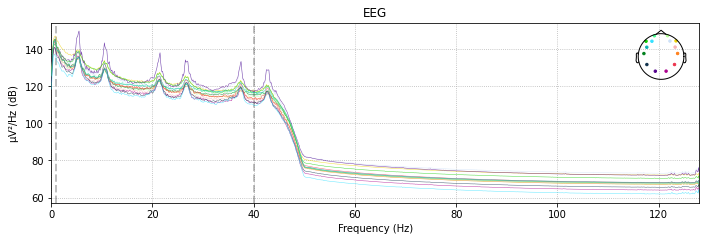

In [14]:
#band pass filtering, required for ICA

raw_speaking.plot_psd(fmax=128)

low_cut = 1
hi_cut  = 40

raw_speaking_filt = raw_speaking.copy().filter(low_cut, hi_cut)
raw_speaking_filt.plot_psd(fmax=128)

## ICA

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 14 components
Fitting ICA took 8.6s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1300 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1300 matching events found
No baseline correction applied
0 projection items activated


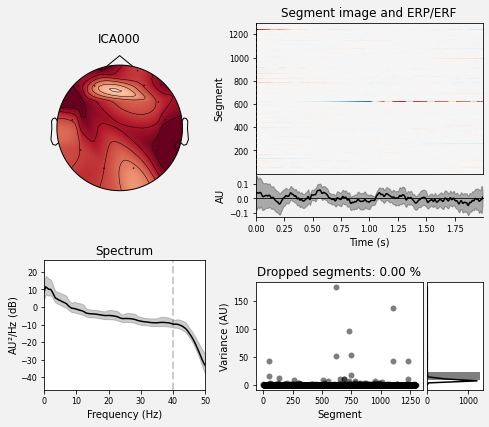

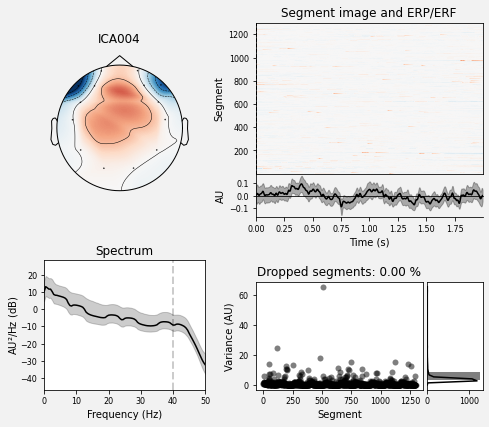

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [92]:
speaking_processed_mne = raw_speaking_filt.copy()
ica = mne.preprocessing.ICA(max_iter=800)
ica.fit(speaking_processed_mne)
ica.exclude = [0, 4]  # details on how we picked these are omitted here
ica.plot_properties(speaking_processed_mne, picks=ica.exclude)

Creating RawArray with float64 data, n_channels=14, n_times=665600
    Range : 0 ... 665599 =      0.000 ...  2599.996 secs
Ready.


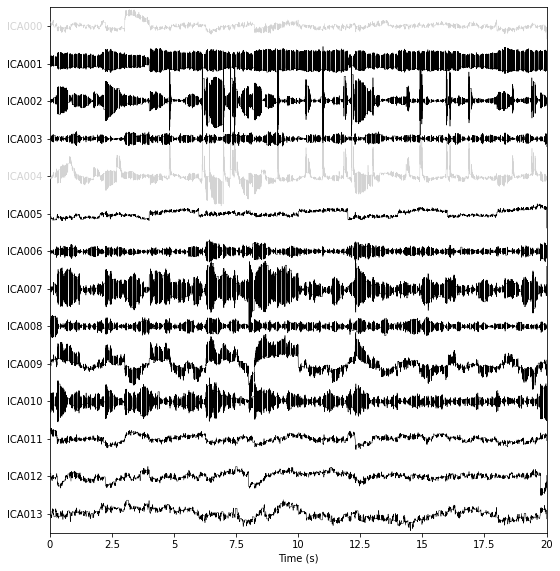

Creating RawArray with float64 data, n_channels=14, n_times=665600
    Range : 0 ... 665599 =      0.000 ...  2599.996 secs
Ready.


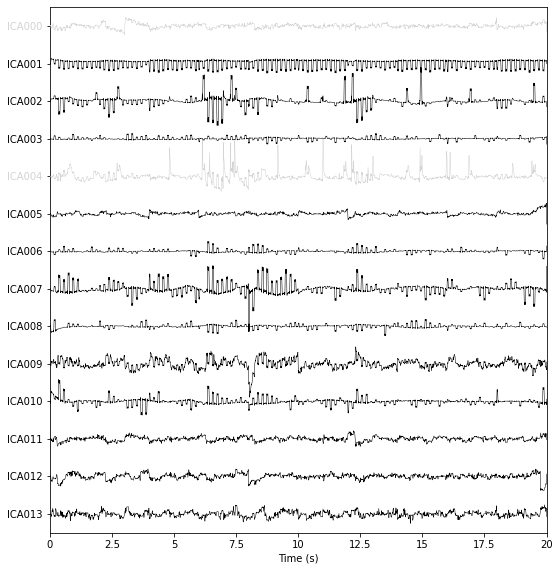

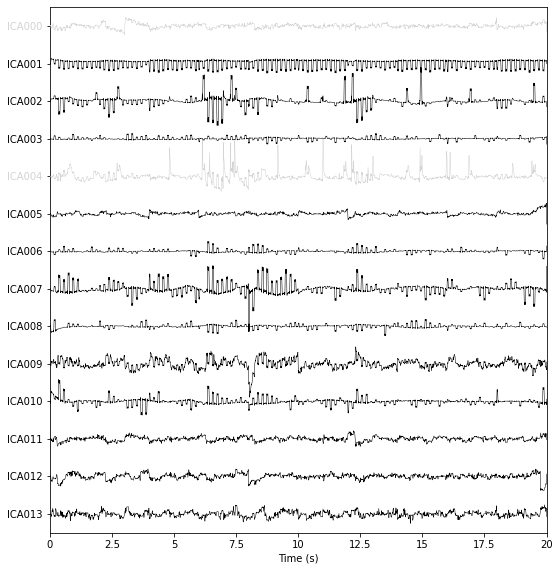

In [93]:
#signal graph (unfiltered and filtered data)

raw_speaking.load_data()
ica.plot_sources(raw_speaking, show_scrollbars=False)
ica.plot_sources(speaking_processed_mne, show_scrollbars=False)

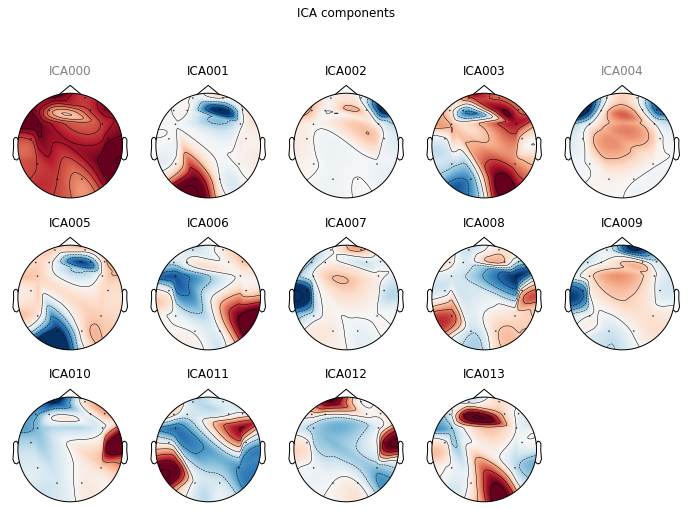

[<MNEFigure size 702x526.68 with 14 Axes>]

In [94]:
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components


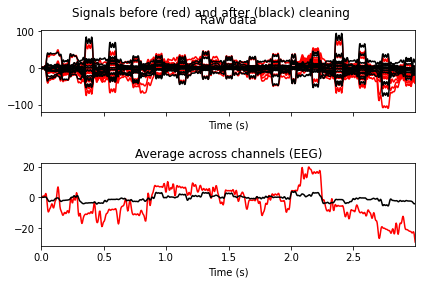

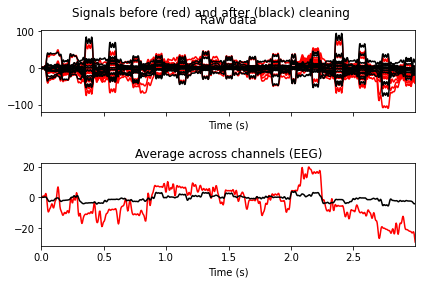

In [95]:
ica.plot_overlay(speaking_processed_mne, exclude=[0, 4])

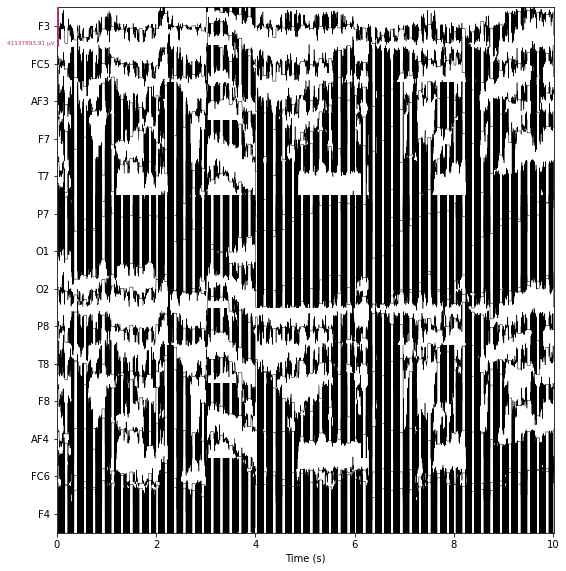

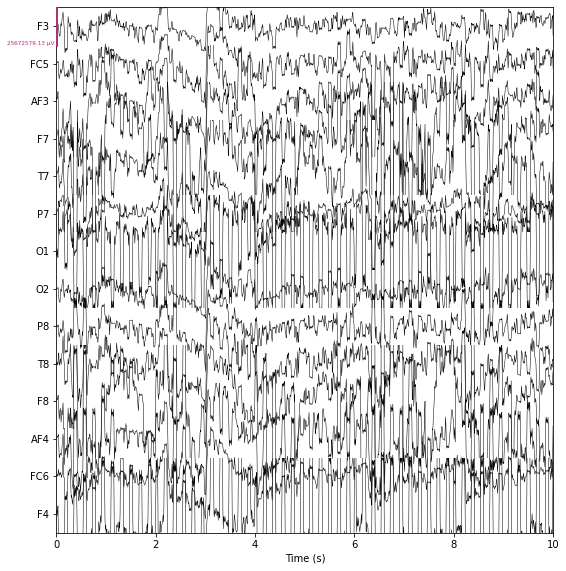

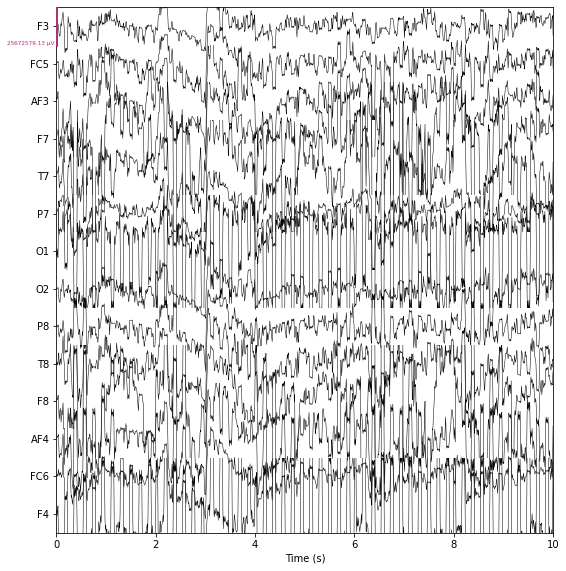

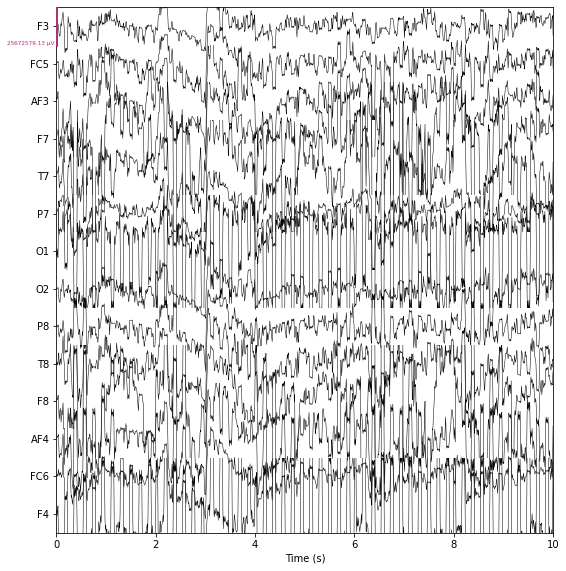

In [19]:
raw_speaking.plot( n_channels=14,
         show_scrollbars=False, scalings='auto')
raw_speaking_filt.plot( n_channels=14,
         show_scrollbars=False, scalings='auto')
speaking_processed_mne.plot(n_channels=14,
                 show_scrollbars=False, scalings='auto')


## Creating events and epochs from filtered data

In [20]:
events_speaking = mne.make_fixed_length_events(speaking_processed_mne, start=0, stop=4504, duration=2)
events_dict = {'Visual' : 1,
               'Audio' : 2,
               'Text' : 3,
               'None': 4}
events_speaking.shape
events_speaking[np.array(modes_of_stimuli) == 'audio', 2] = np.array([2 for i in range(400)])
events_speaking[np.array(modes_of_stimuli) == 'text', 2] = np.array([3 for i in range(400)])
events_speaking[np.array(modes_of_stimuli) == 'None', 2] = np.array([4 for i in range(100)])
events_speaking

array([[     0,      0,      2],
       [   512,      0,      1],
       [  1024,      0,      1],
       ...,
       [664064,      0,      4],
       [664576,      0,      1],
       [665088,      0,      3]])

Not setting metadata
1300 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1300 events and 513 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 1299 events and 513 original time points ...
Using data from preloaded Raw for 10 events and 513 original time points ...


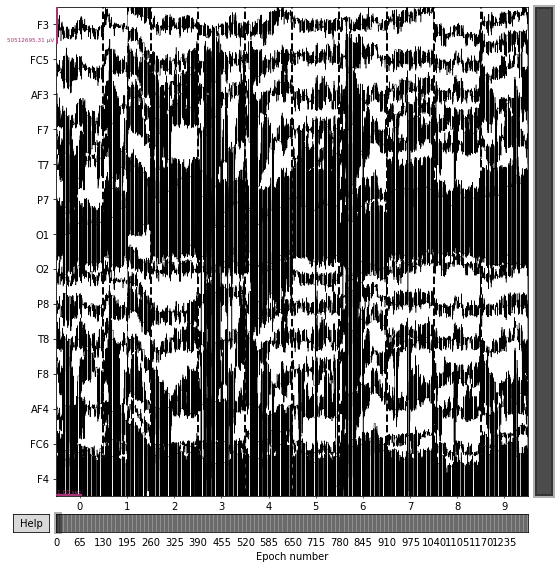

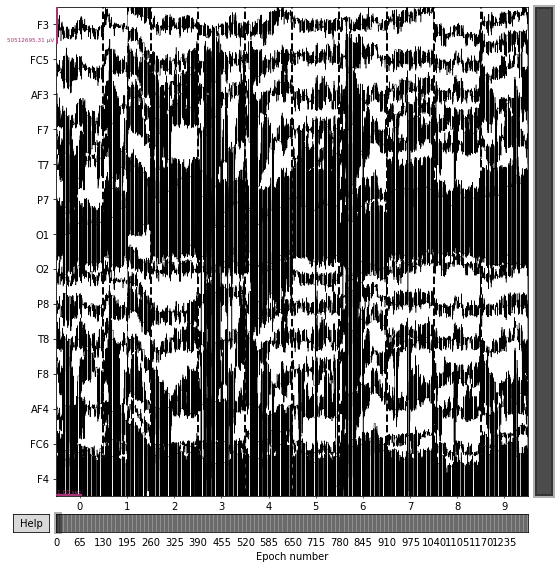

In [21]:
speaking_epoched = mne.Epochs(raw_speaking, tmin=0, tmax = 2, baseline=(0, 0), events = events_speaking, event_id=events_dict)
speaking_epoched.plot(events = events_speaking, n_epochs=10, scalings = 'auto')

## Playing around with epoched data

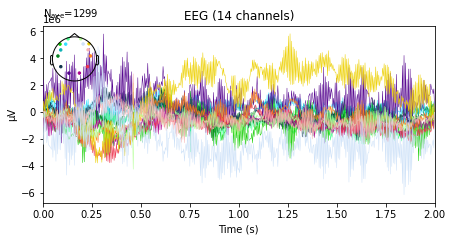

In [22]:
ER_all = speaking_epoched.average()
fig2 = ER_all.plot(spatial_colors=True)

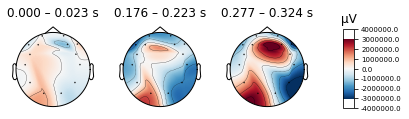

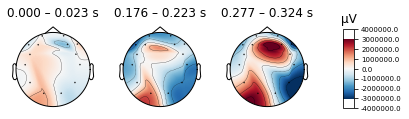

In [23]:
ER_all.plot_topomap(times=[0, 0.2, 0.3], average=0.05)

No projector specified for this dataset. Please consider the method self.add_proj.


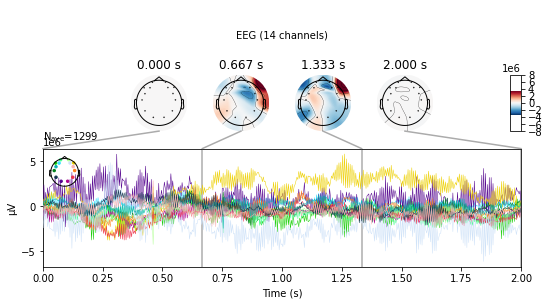

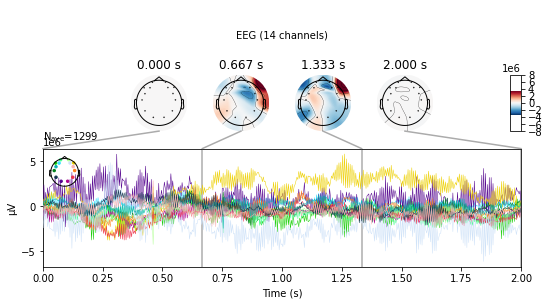

In [24]:
ER_all.plot_joint(times='auto')

No projector specified for this dataset. Please consider the method self.add_proj.


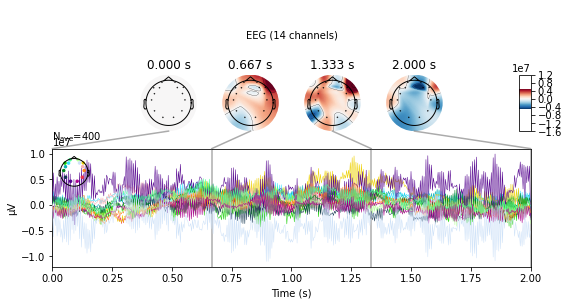

No projector specified for this dataset. Please consider the method self.add_proj.


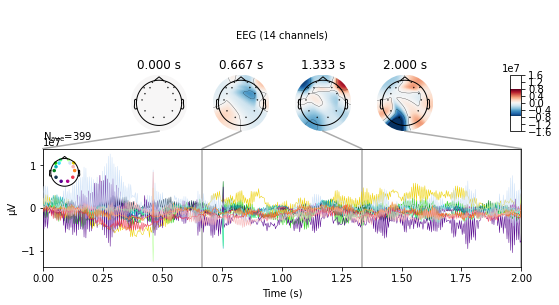

No projector specified for this dataset. Please consider the method self.add_proj.


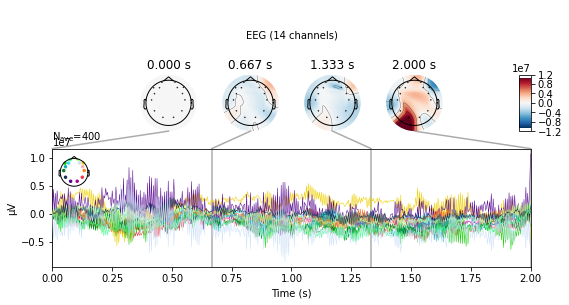

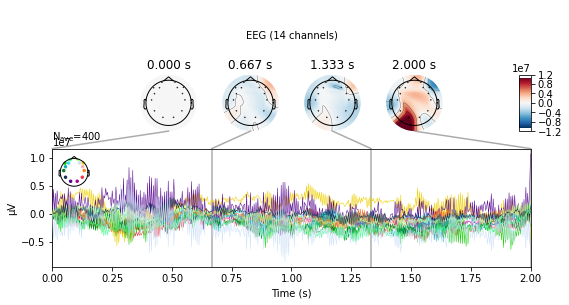

In [25]:
average_audio = speaking_epoched['Audio'].average()
average_text = speaking_epoched['Text'].average()
average_visual = speaking_epoched['Visual'].average()

average_audio.plot_joint(times='auto')
average_text.plot_joint(times='auto')
average_visual.plot_joint(times='auto')

## Evoked responses

In [26]:
occipital = ['O1', 'O2']
temporal = ['T7', 'T8']
broca = ['F7']

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


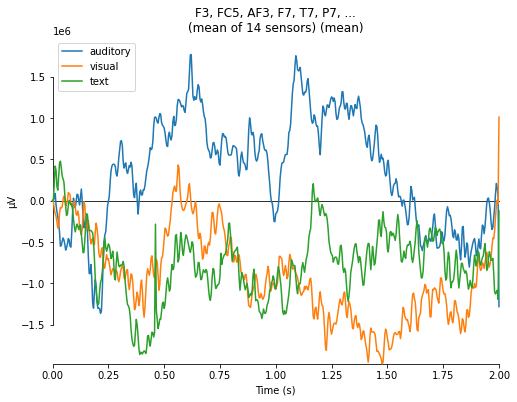

[<Figure size 576x432 with 1 Axes>]

In [27]:
evokeds = dict(auditory=average_audio, visual=average_visual, text=average_text)
picks = [ch_names[n] for n in range(0, 14)]
mne.viz.plot_compare_evokeds(evokeds, picks, combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


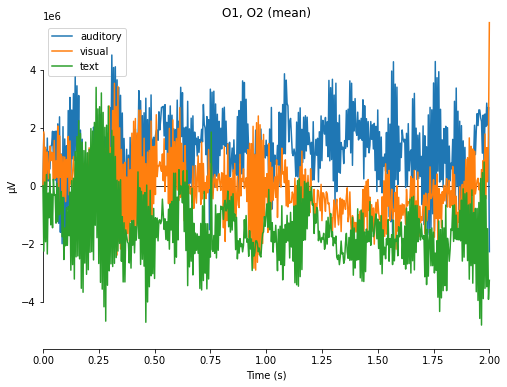

[<Figure size 576x432 with 1 Axes>]

In [28]:
mne.viz.plot_compare_evokeds(evokeds, picks = occipital, combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


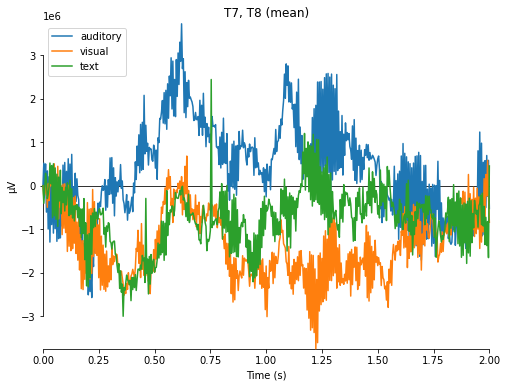

[<Figure size 576x432 with 1 Axes>]

In [29]:
mne.viz.plot_compare_evokeds(evokeds, picks = temporal, combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


C:\Users\ruthwik\AppData\Local\Temp\ipykernel_33924\2533468638.py:1: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks = broca, combine='mean')


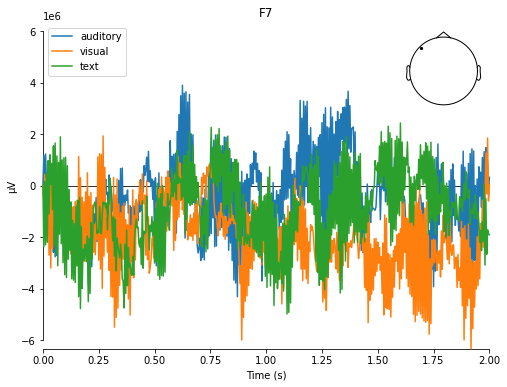

[<Figure size 576x432 with 2 Axes>]

In [30]:
mne.viz.plot_compare_evokeds(evokeds, picks = broca, combine='mean')

# Machine learning models (split into subsections)

## Feature extraction

In [54]:
speaking_processed = speaking_processed_mne.to_data_frame().drop(columns = ['time']).to_numpy().reshape(speaking.shape[0] // (512), 512 * 14)
speaking_processed.shape

(1300, 7168)

In [101]:
x_train, x_test, y_train, y_test = train_test_split(speaking_processed, targets)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(975, 7168) (975,) (325, 7168) (325,)


In [102]:
onehot_encoder = OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train[:, None])
y_train_IE = np.argmax(y_train, axis = 1)
y_test = np.argmax(onehot_encoder.transform(y_test[:, None]), axis = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_train_IE.shape, y_test.shape)

(975, 7168) (325, 7168) (975, 5) (975,) (325,)


In [103]:
pca = PCA(0.999)
x_train_PCA = pca.fit_transform(x_train)
x_test_PCA = pca.transform(x_test)
print(x_train.shape, x_test.shape, x_train_PCA.shape, x_test_PCA.shape)

(975, 7168) (325, 7168) (975, 826) (325, 826)


## DNN trail

In [104]:
epochs = 500
batch_size = 4

DNN_simple = Sequential()
DNN_simple.add(Dense(50, input_dim= x_train_PCA.shape[1]))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dropout(0.2))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(5, input_dim = 100, activation='sigmoid'))
DNN_simple.compile(loss='categorical_crossentropy', optimizer='Adam',  metrics=['accuracy'])
DNN_simple.summary()
simple_DNN_training = DNN_simple.fit(x_train_PCA, y_train, epochs=epochs, batch_size=batch_size)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 50)                41350     
                                                                 
 dense_73 (Dense)            (None, 100)               5100      
                                                                 
 dense_74 (Dense)            (None, 100)               10100     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_75 (Dense)            (None, 100)               10100     
                                                                 
 dense_76 (Dense)            (None, 5)                 505       
                                                                 
Total params: 67,155
Trainable params: 67,155
Non-tra

244/244 [==============================] - 0s 1ms/step - loss: 759778.1875 - accuracy: 0.9600
Epoch 66/500
244/244 [==============================] - 0s 1ms/step - loss: 1012307.5625 - accuracy: 0.9477
Epoch 67/500
244/244 [==============================] - 0s 1ms/step - loss: 1422472.3750 - accuracy: 0.9354
Epoch 68/500
244/244 [==============================] - 0s 1ms/step - loss: 1014944.3750 - accuracy: 0.9456
Epoch 69/500
244/244 [==============================] - 0s 1ms/step - loss: 1458906.7500 - accuracy: 0.9333
Epoch 70/500
244/244 [==============================] - 0s 1ms/step - loss: 841024.3750 - accuracy: 0.9610
Epoch 71/500
244/244 [==============================] - 0s 1ms/step - loss: 367465.9375 - accuracy: 0.9744
Epoch 72/500
244/244 [==============================] - 0s 1ms/step - loss: 156113.0625 - accuracy: 0.9856
Epoch 73/500
244/244 [==============================] - 0s 1ms/step - loss: 478507.0938 - accuracy: 0.9733
Epoch 74/500
244/244 [========================

244/244 [==============================] - 0s 874us/step - loss: 546672.0000 - accuracy: 0.9887
Epoch 140/500
244/244 [==============================] - 0s 887us/step - loss: 1173496.6250 - accuracy: 0.9764
Epoch 141/500
244/244 [==============================] - 0s 874us/step - loss: 1868238.6250 - accuracy: 0.9713
Epoch 142/500
244/244 [==============================] - 0s 923us/step - loss: 1866905.0000 - accuracy: 0.9795
Epoch 143/500
244/244 [==============================] - 0s 899us/step - loss: 863023.0000 - accuracy: 0.9815
Epoch 144/500
244/244 [==============================] - 0s 885us/step - loss: 1059803.6250 - accuracy: 0.9826
Epoch 145/500
244/244 [==============================] - 0s 989us/step - loss: 1168811.6250 - accuracy: 0.9805
Epoch 146/500
244/244 [==============================] - 0s 977us/step - loss: 1345742.7500 - accuracy: 0.9785
Epoch 147/500
244/244 [==============================] - 0s 1ms/step - loss: 1081017.8750 - accuracy: 0.9764
Epoch 148/500
244/2

244/244 [==============================] - 0s 895us/step - loss: 1380131.7500 - accuracy: 0.9918
Epoch 214/500
244/244 [==============================] - 0s 891us/step - loss: 159887.3906 - accuracy: 0.9979
Epoch 215/500
244/244 [==============================] - 0s 887us/step - loss: 3214409.5000 - accuracy: 0.9887
Epoch 216/500
244/244 [==============================] - 0s 882us/step - loss: 1794382.3750 - accuracy: 0.9897
Epoch 217/500
244/244 [==============================] - 0s 874us/step - loss: 3855392.5000 - accuracy: 0.9774
Epoch 218/500
244/244 [==============================] - 0s 882us/step - loss: 1332850.3750 - accuracy: 0.9867
Epoch 219/500
244/244 [==============================] - 0s 899us/step - loss: 584667.0000 - accuracy: 0.9908
Epoch 220/500
244/244 [==============================] - 0s 911us/step - loss: 278048.6875 - accuracy: 0.9949
Epoch 221/500
244/244 [==============================] - 0s 919us/step - loss: 431419.5625 - accuracy: 0.9938
Epoch 222/500
244/2

244/244 [==============================] - 0s 911us/step - loss: 6142626.5000 - accuracy: 0.9785
Epoch 288/500
244/244 [==============================] - 0s 891us/step - loss: 2198235.0000 - accuracy: 0.9928
Epoch 289/500
244/244 [==============================] - 0s 891us/step - loss: 1623553.0000 - accuracy: 0.9908
Epoch 290/500
244/244 [==============================] - 0s 907us/step - loss: 572028.1875 - accuracy: 0.9938
Epoch 291/500
244/244 [==============================] - 0s 911us/step - loss: 483597.6562 - accuracy: 0.9959
Epoch 292/500
244/244 [==============================] - 0s 915us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 293/500
244/244 [==============================] - 0s 911us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 294/500
244/244 [==============================] - 0s 911us/step - loss: 2263668.5000 - accuracy: 0.9959
Epoch 295/500
244/244 [==============================] - 0s 915us/step - loss: 225115.7969 - accuracy: 0.9990
Epoch 296/500
244/244 

244/244 [==============================] - 0s 938us/step - loss: 1789278.6250 - accuracy: 0.9969
Epoch 362/500
244/244 [==============================] - 0s 936us/step - loss: 5227876.0000 - accuracy: 0.9877
Epoch 363/500
244/244 [==============================] - 0s 932us/step - loss: 5416498.0000 - accuracy: 0.9887
Epoch 364/500
244/244 [==============================] - 0s 955us/step - loss: 7244786.0000 - accuracy: 0.9877
Epoch 365/500
244/244 [==============================] - 0s 932us/step - loss: 3396770.7500 - accuracy: 0.9918
Epoch 366/500
244/244 [==============================] - 0s 919us/step - loss: 1816272.2500 - accuracy: 0.9949
Epoch 367/500
244/244 [==============================] - 0s 932us/step - loss: 444332.5000 - accuracy: 0.9990
Epoch 368/500
244/244 [==============================] - 0s 915us/step - loss: 1537845.8750 - accuracy: 0.9969
Epoch 369/500
244/244 [==============================] - 0s 928us/step - loss: 791451.8125 - accuracy: 0.9959
Epoch 370/500
244

244/244 [==============================] - 0s 981us/step - loss: 3243205.2500 - accuracy: 0.9949
Epoch 436/500
244/244 [==============================] - 0s 948us/step - loss: 1092647.0000 - accuracy: 0.9979
Epoch 437/500
244/244 [==============================] - 0s 960us/step - loss: 426931.0625 - accuracy: 0.9990
Epoch 438/500
244/244 [==============================] - 0s 989us/step - loss: 8061609.0000 - accuracy: 0.9918
Epoch 439/500
244/244 [==============================] - 0s 948us/step - loss: 9856438.0000 - accuracy: 0.9867
Epoch 440/500
244/244 [==============================] - 0s 940us/step - loss: 5580347.5000 - accuracy: 0.9938
Epoch 441/500
244/244 [==============================] - 0s 973us/step - loss: 4095604.7500 - accuracy: 0.9918
Epoch 442/500
244/244 [==============================] - 0s 936us/step - loss: 5926331.5000 - accuracy: 0.9938
Epoch 443/500
244/244 [==============================] - 0s 965us/step - loss: 102818.9219 - accuracy: 0.9979
Epoch 444/500
244

In [105]:
DNN_simple_pred = np.argmax(DNN_simple.predict(x_test_PCA), axis = 1)
DNN_simple_pred
print(DNN_simple_pred[:, None].shape, y_test.shape)

accuracy_score(y_test, DNN_simple_pred[:, None])

11/11 [==============================] - 0s 1ms/step
(325, 1) (325,)


0.2123076923076923

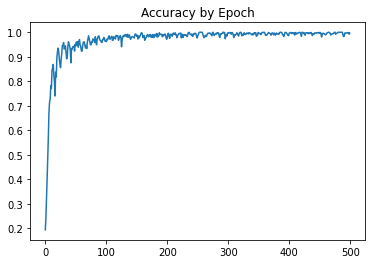

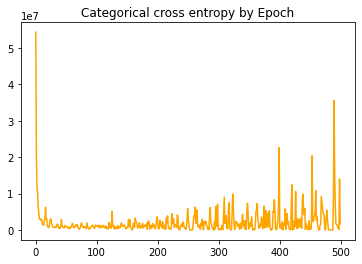

In [106]:
plt.plot(simple_DNN_training.history['accuracy'])
plt.title('Accuracy by Epoch')
plt.show()
plt.plot(simple_DNN_training.history['loss'], color = 'orange')
plt.title('Categorical cross entropy by Epoch')
plt.show()

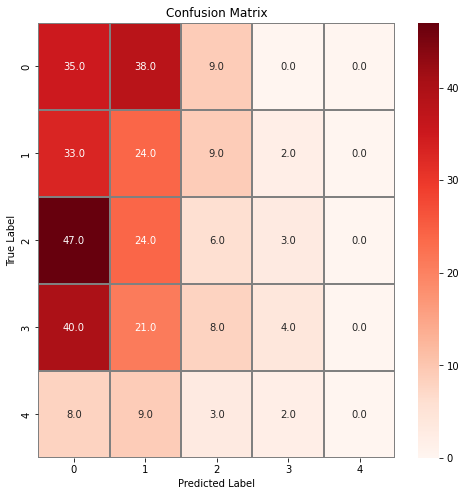

In [107]:
confusion_mtx = confusion_matrix(y_test, DNN_simple_pred[:, None]) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Reds",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## CNN

In [110]:
# # format data for input to the CNN...
X_train_CNN = x_train.reshape(x_train.shape[0], 512, 14, 1)
X_test_CNN = x_test.reshape(x_test.shape[0],512, 14, 1)
# #test_submit_set = np.array(test_submit_set).reshape(test_submit_set.shape[0], 28, 28, 1)

In [133]:
epochs = 100
batch_size = 4

CNN_simple = Sequential()
#add model layers
CNN_simple.add(Conv2D(10, kernel_size=3, activation = 'relu', input_shape=(512, 14, 1)))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Flatten())
CNN_simple.add(Dropout(0.2))
CNN_simple.add(Dense(5, activation= 'softmax'))
init_lr = 1e-4
opt = Adam(learning_rate=init_lr, decay=init_lr / epochs)
CNN_simple.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
CNN_simple.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 510, 12, 10)       100       
                                                                 
 conv2d_60 (Conv2D)          (None, 508, 10, 20)       1820      
                                                                 
 conv2d_61 (Conv2D)          (None, 506, 8, 20)        3620      
                                                                 
 conv2d_62 (Conv2D)          (None, 504, 6, 20)        3620      
                                                                 
 flatten_16 (Flatten)        (None, 60480)             0         
                                                                 
 dropout_16 (Dropout)        (None, 60480)             0         
                                                                 
 dense_91 (Dense)            (None, 5)               

In [134]:
simple_CNN_training = CNN_simple.fit(X_train_CNN, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/100
244/244 [==============================] - 6s 25ms/step - loss: 973076.6875 - accuracy: 0.2226
Epoch 2/100
244/244 [==============================] - 6s 26ms/step - loss: 67910.9297 - accuracy: 0.3918
Epoch 3/100
244/244 [==============================] - 6s 25ms/step - loss: 23284.9141 - accuracy: 0.4882
Epoch 4/100
244/244 [==============================] - 6s 24ms/step - loss: 9920.5605 - accuracy: 0.6379
Epoch 5/100
244/244 [==============================] - 6s 23ms/step - loss: 5021.0137 - accuracy: 0.7610
Epoch 6/100
244/244 [==============================] - 6s 23ms/step - loss: 2622.7527 - accuracy: 0.8359
Epoch 7/100
244/244 [==============================] - 6s 23ms/step - loss: 2396.9897 - accuracy: 0.8513
Epoch 8/100
244/244 [==============================] - 6s 23ms/step - loss: 1562.4100 - accuracy: 0.9138
Epoch 9/100
244/244 [==============================] - 6s 23ms/step - loss: 1030.9442 - accuracy: 0.9118
Epoch 10/100
244/244 [=============================

Epoch 79/100
244/244 [==============================] - 6s 24ms/step - loss: 480.2899 - accuracy: 0.9846
Epoch 80/100
244/244 [==============================] - 6s 25ms/step - loss: 253.2061 - accuracy: 0.9877
Epoch 81/100
244/244 [==============================] - 6s 24ms/step - loss: 194.8107 - accuracy: 0.9918
Epoch 82/100
244/244 [==============================] - 6s 24ms/step - loss: 133.3008 - accuracy: 0.9908
Epoch 83/100
244/244 [==============================] - 6s 24ms/step - loss: 628.3934 - accuracy: 0.9836
Epoch 84/100
244/244 [==============================] - 6s 26ms/step - loss: 199.6797 - accuracy: 0.9887
Epoch 85/100
244/244 [==============================] - 6s 25ms/step - loss: 120.8142 - accuracy: 0.9908
Epoch 86/100
244/244 [==============================] - 6s 25ms/step - loss: 150.6075 - accuracy: 0.9938
Epoch 87/100
244/244 [==============================] - 6s 23ms/step - loss: 60.5536 - accuracy: 0.9969
Epoch 88/100
244/244 [==============================] - 

In [135]:
CNN_simple_pred = np.argmax(CNN_simple.predict(X_test_CNN), axis = 1)
CNN_simple_pred
accuracy_score(y_test, CNN_simple_pred[:, None])

11/11 [==============================] - 0s 23ms/step


0.20307692307692307

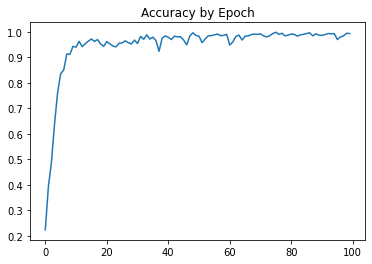

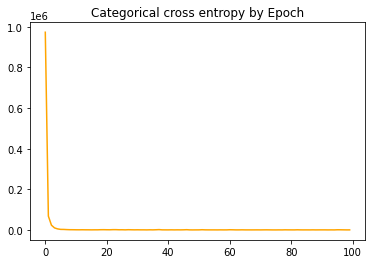

In [136]:
plt.plot(simple_CNN_training.history['accuracy'])
plt.title('Accuracy by Epoch')
plt.show()
plt.plot(simple_CNN_training.history['loss'], color = 'orange')
plt.title('Categorical cross entropy by Epoch')
plt.show()

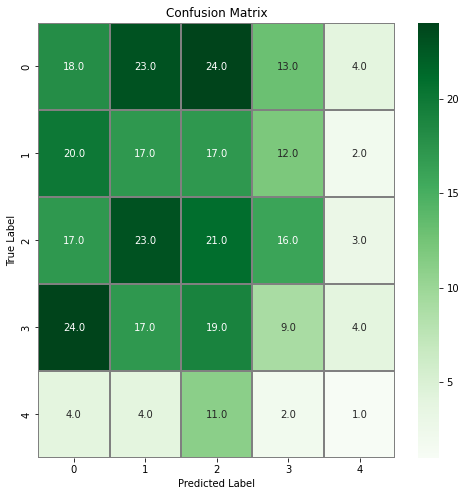

In [137]:
confusion_mtx = confusion_matrix(y_test, CNN_simple_pred[:, None]) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [131]:
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (512,14,1)))
CNN.add(layers.AveragePooling2D())

#CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(10, 3, activation = 'relu'))

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 508, 10, 6)        156       
                                                                 
 average_pooling2d_11 (Avera  (None, 254, 5, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_58 (Conv2D)          (None, 252, 3, 10)        550       
                                                                 
 flatten_15 (Flatten)        (None, 7560)              0         
                                                                 
 dense_88 (Dense)            (None, 120)               907320    
                                                                 
 dense_89 (Dense)            (None, 84)                10164     
                                                     

In [132]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = CNN.fit(x_train,
                 y_train,
                 batch_size = 4,
                 epochs = 100,
                 verbose = 1,
                 )

Epoch 1/100


ValueError: in user code:

    File "C:\Users\ruthwik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ruthwik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ruthwik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ruthwik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ruthwik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ruthwik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_43" is incompatible with the layer: expected shape=(None, 512, 14, 1), found shape=(None, 7168)
